In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df = pd.read_csv("oppgave1/data/lego.population.csv", sep = ",", encoding = "latin1")
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


## Fjerner forklaringsvariabler vi ikke trenger

In [3]:
df2 = df[["Set_Name", "Theme", "Price", "Pieces", "Pages", "Minifigures", "Unique_Pieces"]]

## Fjerner observasjoner med manglende datapunkter

In [4]:
df2 = df2.dropna()

## Gjør themes om til string og fjern alle tegn vi ikke vil ha med

In [5]:
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

## Fjerner dollartegn og trademark-tegn fra datasettet

In [6]:
df2['Price'].astype(str)
df2['Price'] = df2['Price'].str.replace(r'\$', '', regex = True)

## Gjør så prisen om til float

In [7]:
df2['Price'] = df2['Price'].astype(float)

df2

,Set_Name,Theme,Price,Pieces,Pages,Minifigures,Unique_Pieces
13,Stephanie's Summer Heart Box,Friends,7.99,95.0,40.0,1.0,52.0
16,Woody & RC,Disney,9.99,69.0,28.0,1.0,36.0
17,Mia's Summer Heart Box,Friends,7.99,85.0,36.0,1.0,41.0
18,Olivia's Summer Heart Box,Friends,7.99,93.0,40.0,2.0,48.0
19,Police Patrol Car,City,9.99,92.0,36.0,1.0,52.0
...,...,...,...,...,...,...,...
1171,1989 Batmobile,Batman,249.99,3306.0,404.0,3.0,484.0
1172,Tree House,Ideas,199.99,3036.0,428.0,4.0,482.0
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,299.99,3178.0,452.0,13.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,249.99,3120.0,464.0,6.0,525.0


## Enkel lineær regresjon

In [11]:
formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3802.
Date:                Sat, 18 Nov 2023   Prob (F-statistic):          9.01e-288
Time:                        16:07:52   Log-Likelihood:                -3194.2
No. Observations:                 714   AIC:                             6392.
Df Residuals:                     712   BIC:                             6401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2338      0.988     10.363      0.000       8.295      12.173
Pieces         0.0873      0.001     61.664      0.000       0.085       0.090
==============================================================================
Omnibus:                      659.458   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61214.067
Skew:                           3.717   Prob(JB):                         0.00
Kurtosis:                      47.748   Cond. No.                         866.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Enkel LR med regresjonslinje

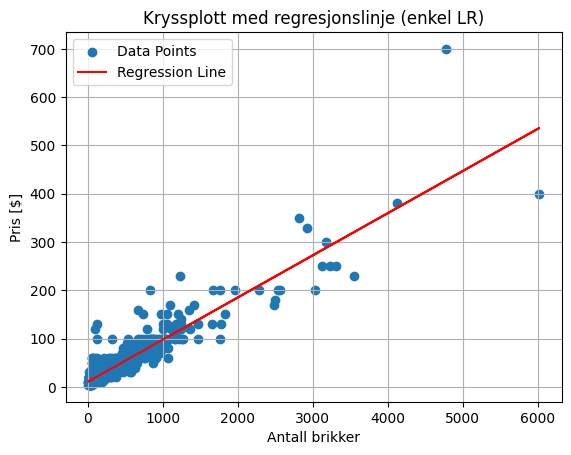

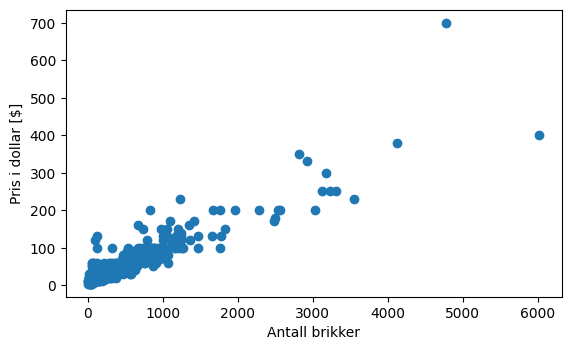

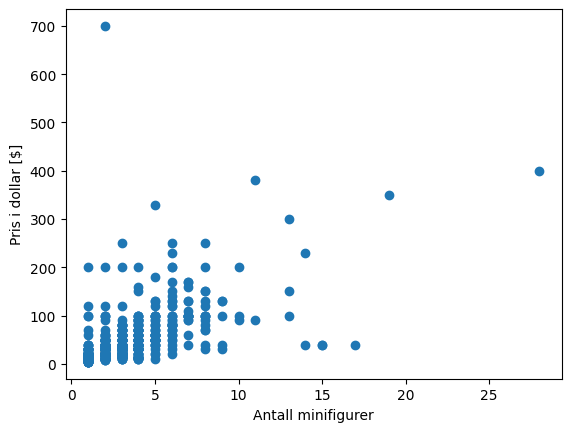

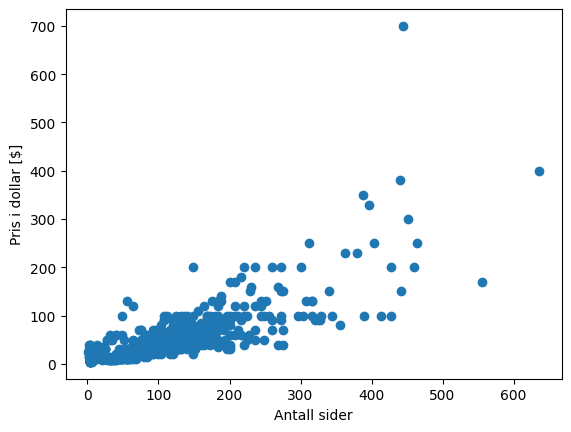

In [12]:
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()
# Antall brikker mot pris
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()
# Minifigurer mot pris
plt.scatter(df2['Minifigures'], df2['Price'])
plt.xlabel('Antall minifigurer')
plt.ylabel('Pris i dollar [$]')
plt.gca()
plt.show()
# Antall sider mot pris
plt.scatter(df2['Pages'], df2['Price'])
plt.xlabel('Antall sider')
plt.ylabel('Pris i dollar [$]')
plt.gca()
plt.show()

Farging

### Variabler for varemerke og ikke varemerke

# TODO Correct variables, is missing Amazone prices a reason? for certain themes not appearing?

In [13]:
mythemes_brands = ['Disney', 'Unikitty', 'NINJAGO', 'Marvel', 'THE LEGO MOVIE 2', 'Harry Potter', 'LEGO Frozen 2', 'Minions', 
                   'Jurassic World', 'DC', 'Monkie Kid']
mythemes_notBrands = ['Friends', 'City', 'DUPLO', 'Speed Champions', 'Hidden Side', 'Classic', 'Juniors', 'Creator 3-in-1', 
                      'Ideas', 'Creator Expert', 'Powered UP', 'LEGO Education']
mythemes_unclearBrands = ['Star Wars', 'Minecraft', 'Batman', 'Trolls World Tour', 'Powerpuff Girls', 'Overwatch', 'Spider-Man', 
                          'Stranger Things', 'Minifigures']
mythemes_all = ['Disney', 'Unikitty', 'NINJAGO', 'Marvel', 'THE LEGO MOVIE 2', 'Harry Potter', 'LEGO Frozen 2', 'Minions', 
                   'Jurassic World', 'DC', 'Monkie Kid', 'Friends', 'City', 'DUPLO', 'Speed Champions', 'Hidden Side',
                   'Classic', 'Juniors', 'Creator 3-in-1', 'Ideas', 'Creator Expert', 'Powered UP', 'LEGO Education',
                   'Star Wars', 'Minecraft', 'Batman', 'Trolls World Tour', 'Powerpuff Girls', 'Overwatch', 'Spider-Man', 
                          'Stranger Things', 'Minifigures']


In [14]:
df2.groupby(['Theme']).size().reset_index(name = 'Count')

,Theme,Count
0,Batman,16
1,City,94
2,Classic,4
3,Creator 3-in-1,21
4,Creator Expert,10
5,DC,8
6,DUPLO,32
7,Disney,35
8,Friends,94
9,Harry Potter,22


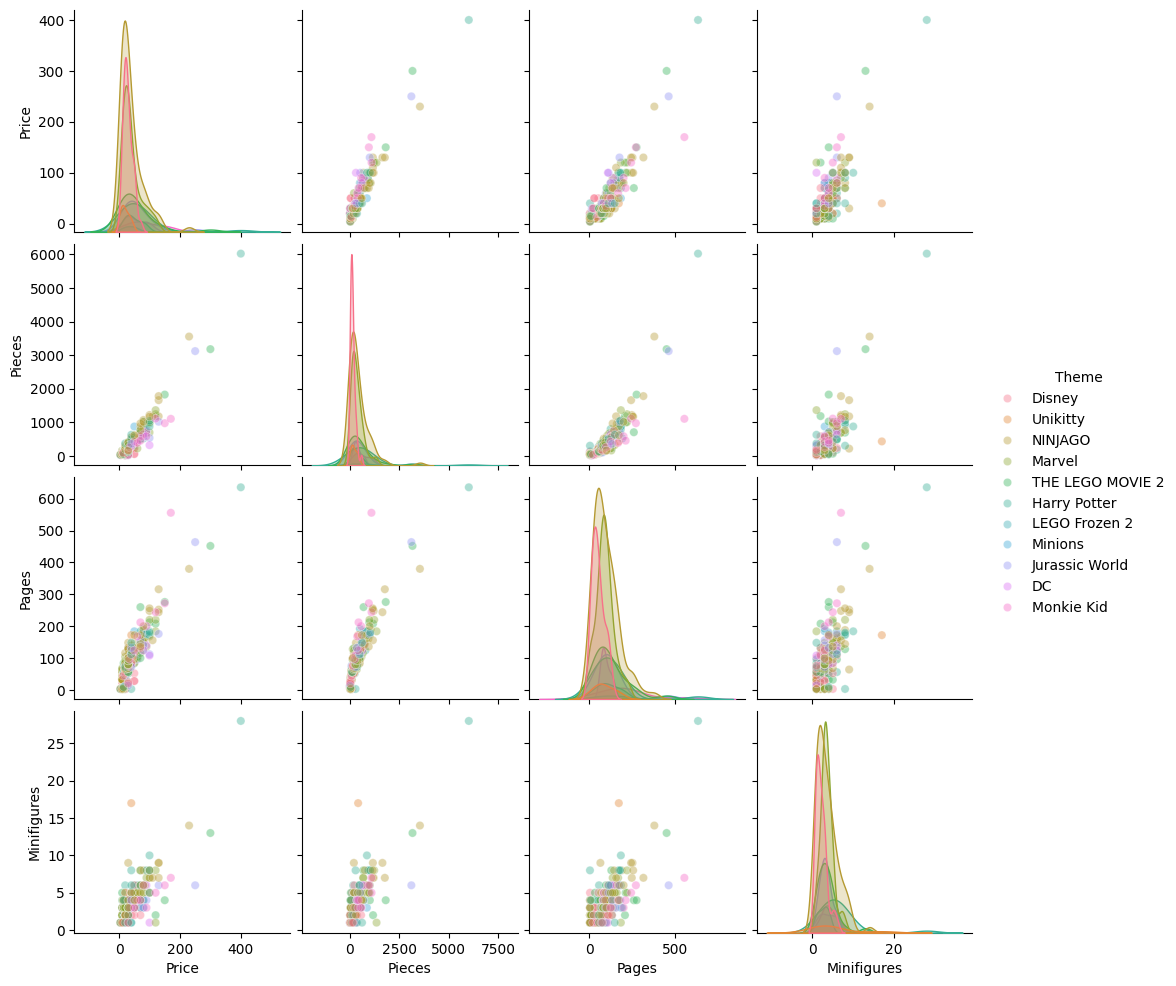

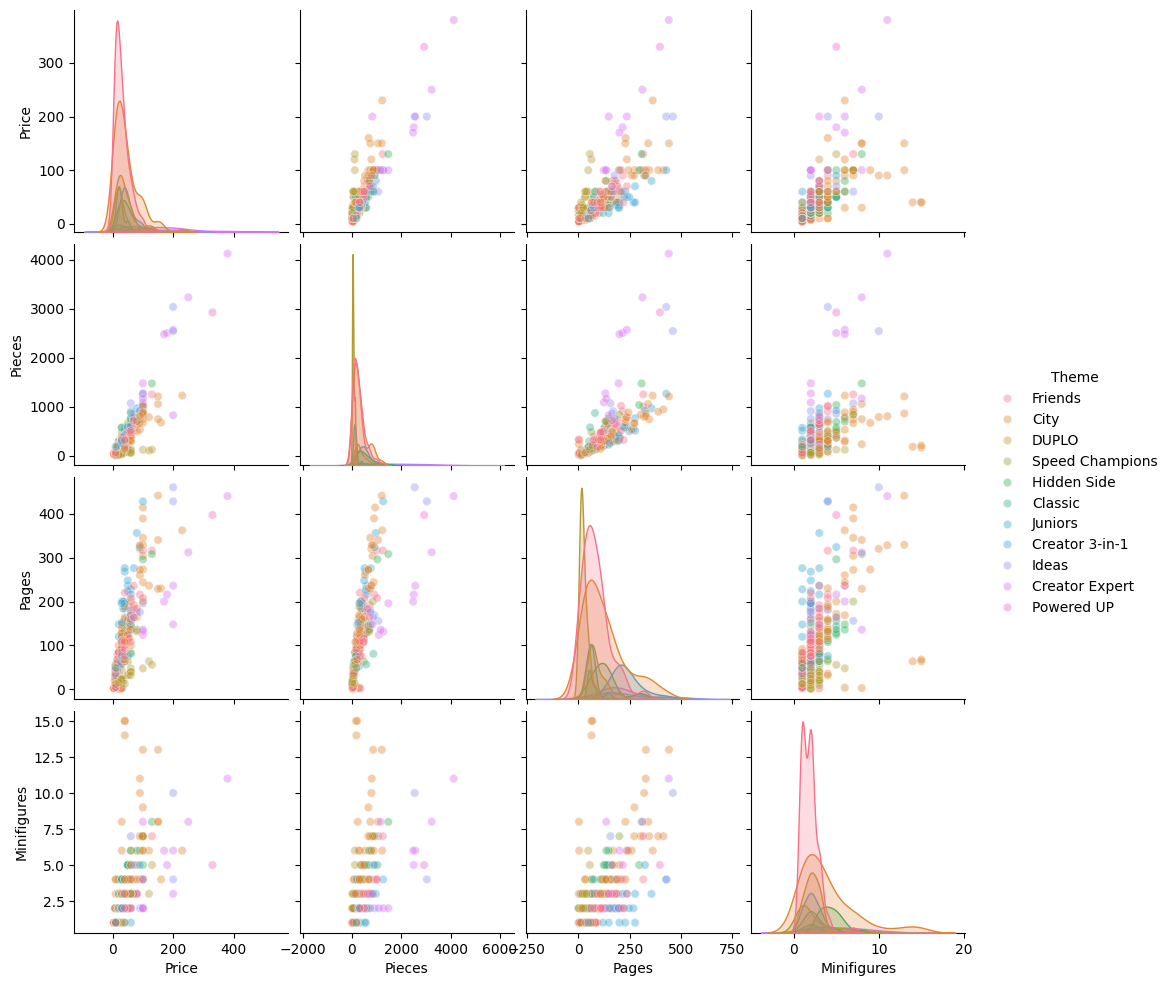

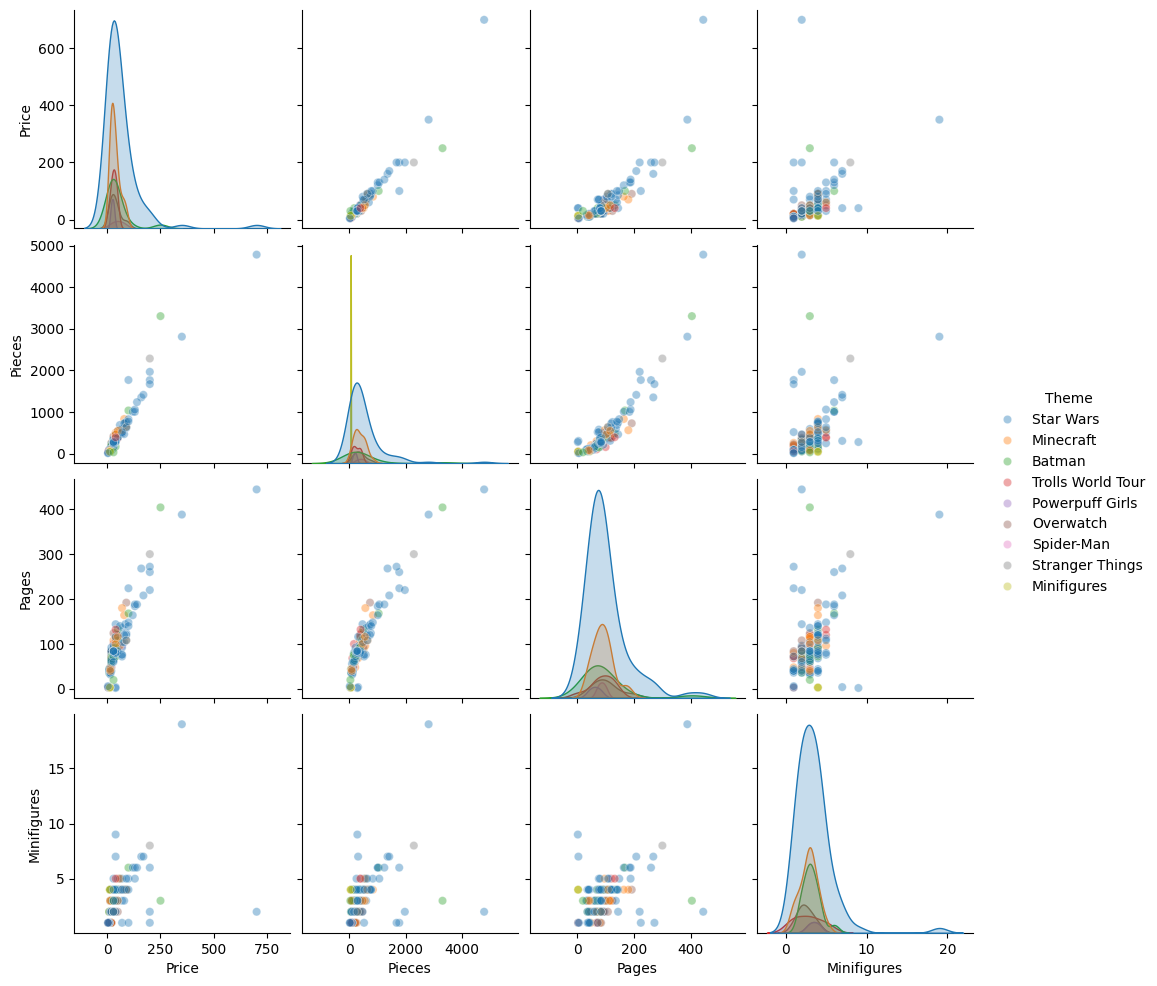

In [15]:
def showMultipleScatterPlotts(arr):
    subset_df = df2[df2['Theme'].isin(arr)]
    sns.pairplot(subset_df, vars = ['Price', 'Pieces', 'Pages', 'Minifigures'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
    plt.show()


showMultipleScatterPlotts(mythemes_brands)
showMultipleScatterPlotts(mythemes_notBrands)
showMultipleScatterPlotts(mythemes_unclearBrands)

### Enkel og flere regresjonslinjer (ikke multippel)

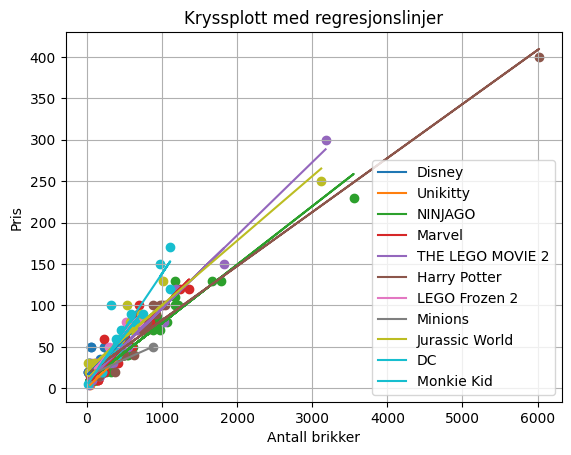

In [16]:
subset_df = df2[df2['Theme'].isin(mythemes_brands)]
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()

# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes_brands):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Theme'].isin([theme])])
    resultater.append(modell3.fit())

# plott av dataene og regresjonslinjene
for i, theme in enumerate(mythemes_brands):
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

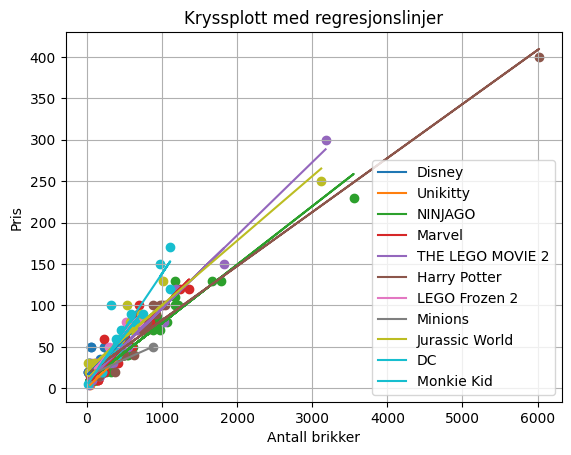

In [17]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()
# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes_brands):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Theme'].isin([theme])])
    resultater.append(modell3.fit())
    
def showMultipleRegressionLine(arr):
# plott av dataene og regresjonslinjene
    for i, theme in enumerate(arr):
        slope = resultater[i].params['Pieces']
        intercept = resultater[i].params['Intercept']

        regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
        regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
        plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
        plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
    plt.xlabel('Antall brikker')
    plt.ylabel('Pris')
    plt.title('Kryssplott med regresjonslinjer')
    plt.legend()
    plt.grid()
    plt.show()


showMultipleRegressionLine(mythemes_brands)
#showMultipleRegressionLine(mythemes_notBrands)
#showMultipleRegressionLine(mythemes_unclearBrands)

No data for theme: LEGO Education


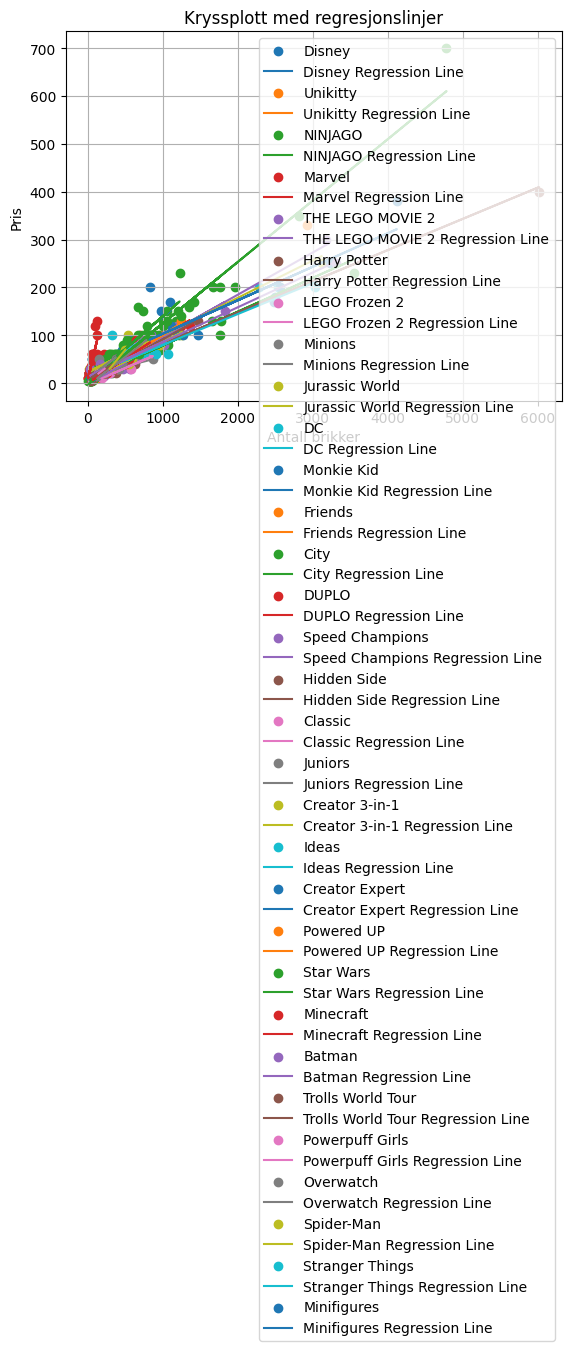

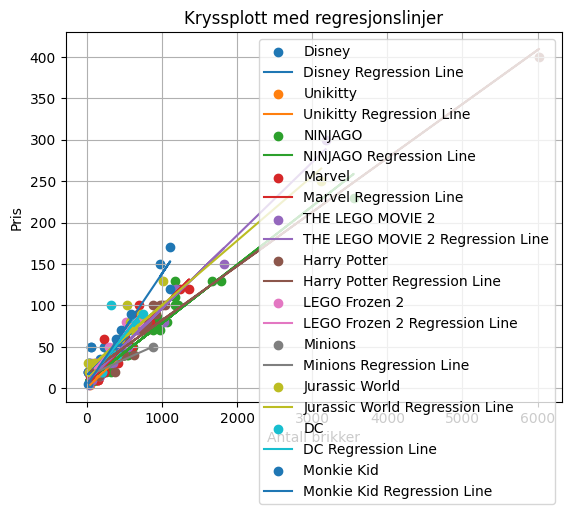

No data for theme: LEGO Education


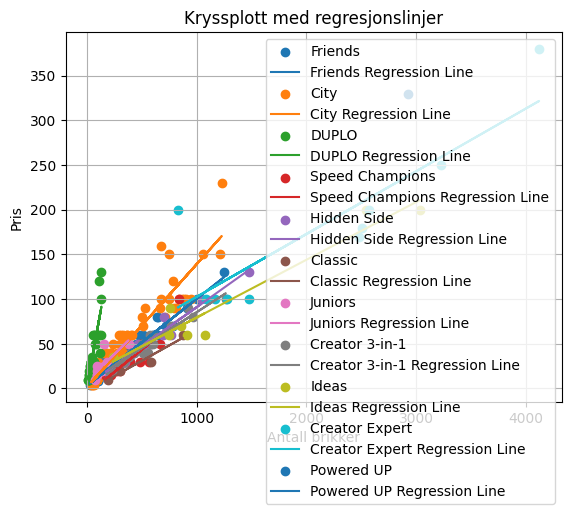

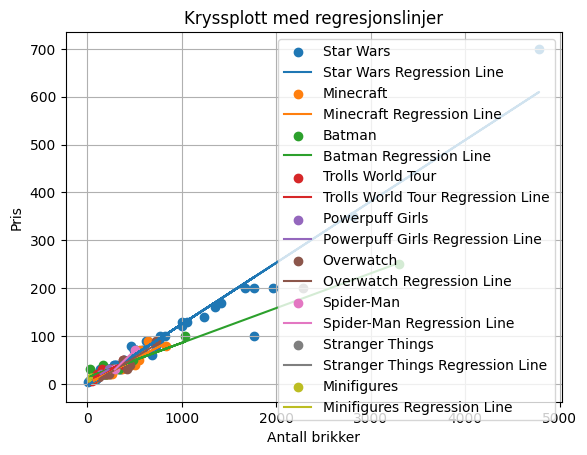

In [18]:
def showMultipleRegressionLine(arr):
    resultater = []
    for theme in arr:
        theme_subset = df2[df2['Theme'] == theme]
        if theme_subset.empty:
            print(f"No data for theme: {theme}")
            continue
        model = smf.ols('Price ~ Pieces', data=theme_subset).fit()
        resultater.append((theme, model))

    for theme, res in resultater:
        slope = res.params['Pieces']
        intercept = res.params['Intercept']

        theme_subset = df2[df2['Theme'] == theme]
        regression_x = np.array(theme_subset['Pieces'])
        regression_y = slope * regression_x + intercept

        plt.scatter(theme_subset['Pieces'], theme_subset['Price'], label=theme)
        plt.plot(regression_x, regression_y, label=f'{theme} Regression Line')

    plt.xlabel('Antall brikker')
    plt.ylabel('Pris')
    plt.title('Kryssplott med regresjonslinjer')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with the array of themes
showMultipleRegressionLine(mythemes_all)

showMultipleRegressionLine(mythemes_brands)
showMultipleRegressionLine(mythemes_notBrands)
showMultipleRegressionLine(mythemes_unclearBrands)


### Evaluering av modeller

In [80]:
unclear_conditions = df2['Theme'].isin(mythemes_unclearBrands)
original_conditions = df2['Theme'].isin(mythemes_notBrands)
brand_conditions = df2['Theme'].isin(mythemes_brands)

df2['Varemerke'] = np.select([unclear_conditions, original_conditions, brand_conditions], ['Unclear', 'Original', 'Brand'])

dummy_vars = pd.get_dummies(df2['Varemerke'], prefix='Varemerke')
df_with_dummies = pd.concat([df2, dummy_vars], axis=1)

In [93]:
def showQQPlot(dataframe):
    # Steg 5: Evaluere om modellen passer til dataene
    # med interaksjonsledd mellom antall brikker og tema

    modell3_mlri = smf.ols(
        'Price ~ Varemerke_Unclear + Varemerke_Original + Varemerke_Brand + Pieces + Pages + Minifigures',
        data = dataframe)
    modell3_mlri.fit().summary()

    # Plotte predikert verdi mot residual

    figure, axis = plt.subplots(1, 2, figsize = (15, 5))
    sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
    axis[0].set_ylabel("Residual")
    axis[0].set_xlabel("Predikert verdi")

    # Lage kvantil-kvantil-plott for residualene
    sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
    axis[1].set_ylabel("Kvantiler i residualene")
    axis[1].set_xlabel("Kvantiler i normalfordelingen")
    plt.show()

In [94]:
def getSubsetDataFrame(dataframe, array):
    subset_df = dataframe[dataframe['Theme'].isin(array)]
    return subset_df

In [95]:
def getSummary(dataframe):
    formel = 'Price ~ Varemerke_Unclear + Varemerke_Original + Varemerke_Brand + Pieces + Pages + Minifigures'
    modell = smf.ols(formel, data = dataframe)
    resultat = modell.fit()
    return resultat.summary()

In [96]:
getSummary(df_with_dummies)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     796.0
Date:                Sat, 18 Nov 2023   Prob (F-statistic):          9.52e-288
Time:                        16:54:54   Log-Likelihood:                -3178.7
No. Observations:                 714   AIC:                             6369.
Df Residuals:                     708   BIC:                             6397.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.4722      1.075      4.159      0.000       2.361       6.583
Varemerke_Unclear[T.True]      4.5365      1.397      3.247      0.001       1.794       7.279
Varemerke_Original[T.True]     1.1652      1.116      1.044      0.297      -1.027       3.357
Varemerke_Brand[T.True]       -1.2295      1.168     -1.053      0.293      -3.522       1.063
Pieces                         0.0768      0.003     30.485      0.000       0.072       0.082
Pages                          0.0699      0.016      4.311      0.000       0.038       0.102
Minifigures                    0.5969      0.409      1.460      0.145      -0.206       1.400
==============================================================================
Omnibus:                      766.425   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110538.851
Skew:                           4.660   Prob(JB):                         0.00
Kurtosis:                      63.239   Cond. No.                     4.20e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.03e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

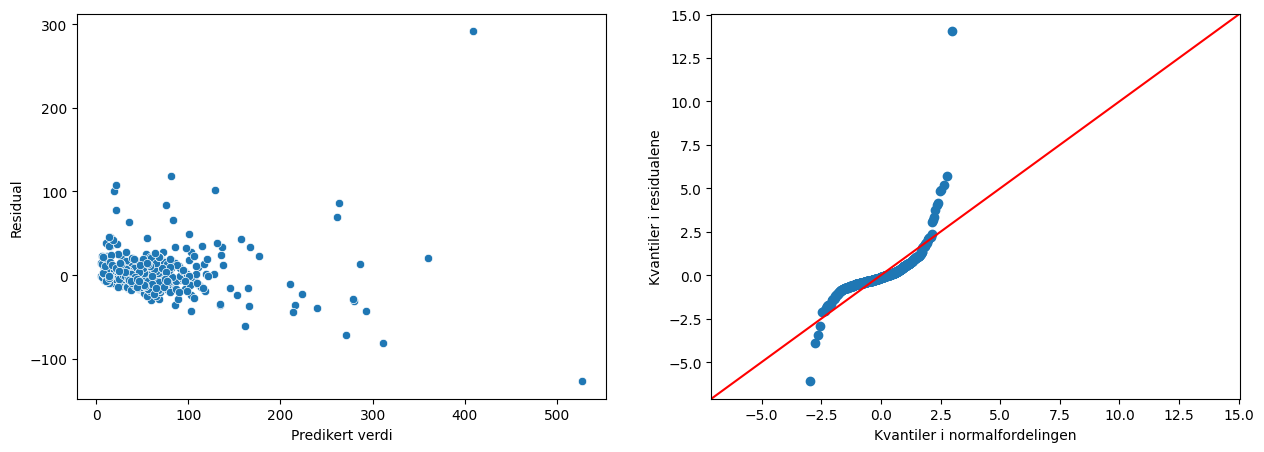

In [97]:
showQQPlot(df_with_dummies)

In [120]:
def estimatedValue(varemerke, pieces, pages, minifigures):
    selected_varemerke = 0
    match (varemerke):
        case "Unclear":
            selected_varemerke = 4.5365
        case "Original":
            selected_varemerke = 1.1652
        case "Brand":
            selected_varemerke = -1.2295
        case _:
            return 0
    return round(4.4722 + selected_varemerke + (0.0768 * pieces) + (0.0699 * pages) + (0.5969 * minifigures), 2)

In [121]:
print(df2.loc[df2['Price'] == 149.99])

                        Set_Name             Theme   Price  Pieces  Pages  \
753   Rocket Assembly &Transport              City  149.99  1055.0  340.0   
764       Ocean Exploration Ship              City  149.99   745.0  229.0   
805              The Rexcelsior!  THE LEGO MOVIE 2  149.99  1826.0  276.0   
809                 Capital City              City  149.99  1211.0  441.0   
1165    Monkey King Warrior Mech        Monkie Kid  149.99   975.0  272.0   

      Minifigures  Unique_Pieces Varemerke  
753           8.0          364.0  Original  
764           8.0          314.0  Original  
805           4.0          377.0     Brand  
809          13.0          489.0  Original  
1165          6.0          435.0     Brand  


In [122]:
print("Capital City (City) estimated price = ", estimatedValue("Original", 1211.0, 441.0, 13.0))
print("Rocket Assembly & Transport (City) estimated price = ", estimatedValue("Original", 1055.0, 340.0, 8.0))
print("Ocean Exploration Ship (City) estimated price = ", estimatedValue("Original", 745.0, 229.0, 8.0))

print("The Rexcelsior! (TLM2) estimated price = ", estimatedValue("Brand", 1826.0, 276.0, 4.0))
print("Monkey Kong Warrior Mech (Monkie Kid) estimated price = ", estimatedValue("Brand", 975.0, 272.0, 6.0))

Capital City (City) estimated price =  137.23
Rocket Assembly & Transport (City) estimated price =  115.2
Ocean Exploration Ship (City) estimated price =  83.64
The Rexcelsior! (TLM2) estimated price =  165.16
Monkey Kong Warrior Mech (Monkie Kid) estimated price =  100.72
